In [1]:
from lgca import get_lgca
import numpy as np
import matplotlib.pyplot as plt

def errors():
    inh_l = False
    for i in range(lgca.maxlabel.astype(int)+1):
        if lgca.props['lab_m'][i] <= lgca.maxlabel_init:
            inh_l = True
        else:
            inh_l = False
    if inh_l:
        print('inheritance label passen')
    else:
        print('Fehler: inheritance label passen nicht!')
        
    if len(lgca.props['lab_m'])==len(lgca.props['r_b']) and len(lgca.props['r_b'])==lgca.maxlabel+1:
        print('len(props) passt')
    else:
        print('Fehler: len(props) passen nicht!')

timesteps = 100 
d = 7
dens = 1.
birthrate = 1
lgca= get_lgca(ib=True, geometry='lin', interaction='inheritance',\
               density = dens, dims = d, r_b = birthrate, variation = False)
print('maxlabel_init:', lgca.maxlabel_init)

death rate set to r_d =  0.02
standard deviation set to =  0.1
maxlabel_init: 14


Progress: [####################] 100% Done...


<IPython.core.display.Javascript object>


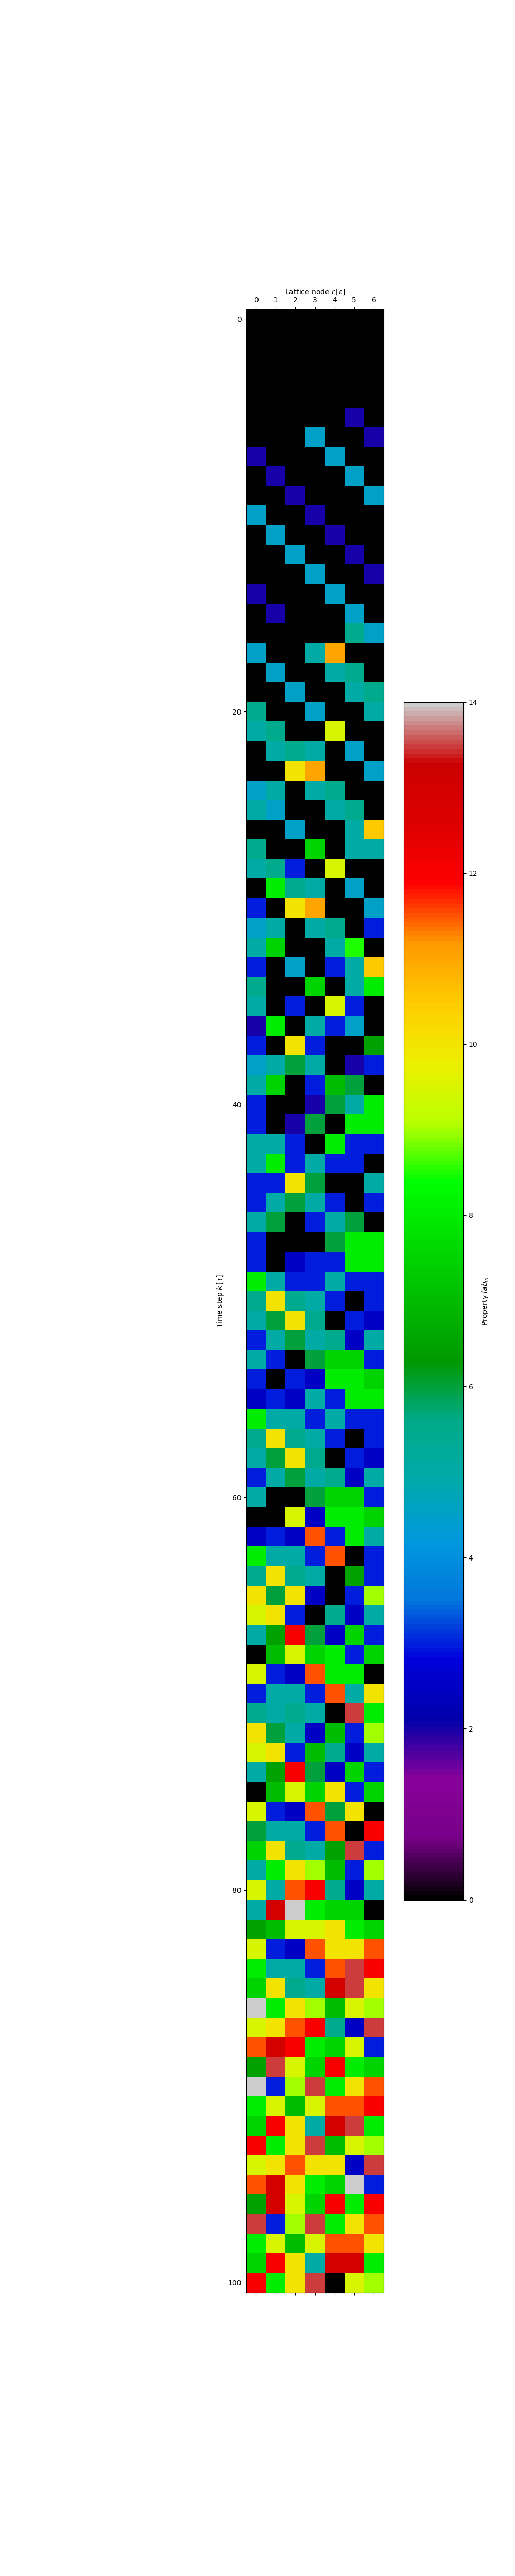

In [2]:
lgca.timeevo(timesteps, record=True)
%matplotlib notebook
lgca.plot_prop_spatial(prop = 'lab_m', cmap = 'nipy_spectral', figsize = (10,50))


#errors()
#lgca.plot_density()

In [ ]:
lgca.plot_prop_spatial(prop = 'num_off', cmap = 'nipy_spectral', figsize = (10,50))
#print(lgca.props['r_b'])
#print(lgca.props['lab_m'])

In [ ]:
def count_fam():
    num = np.zeros(lgca.maxlabel_init.astype(int)+1)
    num[0] = -1
    for entry in range(len(lgca.props['lab_m'])):
        num[lgca.props['lab_m'][entry]] += 1
    
    print('genealogical tree:', num[1:].astype(int))
    print('number of ancestors:', num[0].astype(int))
    print('number of offsprings:', num[1:].sum().astype(int))
    print('max family number is %d with ancestor cell %d' % (num[1:].max().astype(int), num.tolist().index(num[1:].max())))
count_fam()